## 掛接 Google Drive

In [1]:
!nvidia-smi

Fri Jun 24 05:45:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Shareddrives/DLfinal

/content/drive/Shareddrives/DLfinal


In [4]:
cp train.zip /content/sample_data/

In [5]:
cp test.zip /content/sample_data/

In [6]:
cd /content/sample_data/

/content/sample_data


In [7]:
! unzip train.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: train/馬鈴薯燉肉/38407.jpg  
  inflating: train/馬鈴薯燉肉/38409.jpg  
  inflating: train/馬鈴薯燉肉/38410.jpg  
  inflating: train/馬鈴薯燉肉/38411.jpg  
  inflating: train/馬鈴薯燉肉/38412.jpg  
  inflating: train/馬鈴薯燉肉/38414.jpg  
  inflating: train/馬鈴薯燉肉/38417.jpg  
  inflating: train/馬鈴薯燉肉/38418.jpg  
  inflating: train/馬鈴薯燉肉/38421.jpg  
  inflating: train/馬鈴薯燉肉/38423.jpg  
  inflating: train/馬鈴薯燉肉/38424.jpg  
  inflating: train/馬鈴薯燉肉/38425.jpg  
  inflating: train/馬鈴薯燉肉/38431.jpg  
  inflating: train/馬鈴薯燉肉/38432.jpg  
  inflating: train/馬鈴薯燉肉/38434.jpg  
  inflating: train/馬鈴薯燉肉/38435.jpg  
  inflating: train/馬鈴薯燉肉/38436.jpg  
  inflating: train/馬鈴薯燉肉/38437.jpg  
  inflating: train/馬鈴薯燉肉/38440.jpg  
  inflating: train/馬鈴薯燉肉/38443.jpg  
  inflating: train/馬鈴薯燉肉/38444.jpg  
  inflating: train/馬鈴薯燉肉/38445.jpg  
  inflating: train/馬鈴薯燉肉/38446.jpg  
  inflating: train/馬鈴薯燉肉/38447.jpg  
  inflating: train/馬鈴薯燉肉/38448.jpg  
  inflating: train/馬鈴薯燉肉/38449.jpg  
  inflating: trai

In [8]:
! unzip test.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: test/油菜/2021.jpg    
  inflating: test/油菜/2024.jpg    
  inflating: test/油菜/2025.jpg    
  inflating: test/油菜/2035.jpg    
  inflating: test/油菜/2038.jpg    
  inflating: test/油菜/2039.jpg    
  inflating: test/油菜/2041.jpg    
  inflating: test/油菜/2047.jpg    
  inflating: test/油菜/2059.jpg    
  inflating: test/油菜/2061.jpg    
  inflating: test/油菜/2068.jpg    
  inflating: test/油菜/2072.jpg    
  inflating: test/油菜/2077.jpg    
  inflating: test/油菜/2085.jpg    
  inflating: test/油菜/2087.jpg    
  inflating: test/油菜/2093.jpg    
  inflating: test/油菜/2097.jpg    
  inflating: test/油菜/2113.jpg    
  inflating: test/油菜/2118.jpg    
  inflating: test/油菜/2121.jpg    
  inflating: test/油菜/2129.jpg    
  inflating: test/油菜/2147.jpg    
  inflating: test/油菜/2151.jpg    
  inflating: test/油菜/2156.jpg    
  inflating: test/油菜/2157.jpg    
  inflating: test/油菜/2162.jpg    
  inflating: test/油菜/2163.jpg    
  inflating: test/油菜/2172.jpg    
  inflating: test/油菜/2179.j

In [9]:
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import cv2
import tensorflow_datasets as tfds
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tqdm import tqdm,trange

## 載入資料

In [10]:
dirpath='/content/drive/Shareddrives/DLfinal/'
os.listdir(dirpath) 

['test.zip',
 'train.zip',
 'test',
 'new_train-20220617T152414Z-001.zip',
 'new_train',
 '第一階段',
 '第二階段',
 'train',
 '第三階段',
 '第四階段',
 'food-101-keras+balance+medsize_model.h5',
 'FinalProject副本.ipynb',
 'FinalProject.ipynb']

In [ ]:
minw=1000
minh=1000
wlist=[]
hlist=[]
print('test')
for a in os.listdir(dirpath+'/test'):
  print(a)
  for b in os.listdir(dirpath+'/test/'+a):
    img=cv2.imread(dirpath+'/test/'+a+'/'+b)
    try:
      if(img.shape[0]<minw):
        minw=img.shape[0]
        minwimg='/test/'+a+'/'+b
      if(img.shape[1]<minh):
        minh=img.shape[1]
        minhimg='/test/'+a+'/'+b
      wlist.append(img.shape[0])
      hlist.append(img.shape[1])
    except:
      print(a+'/'+b+' error')
  print(minw)
  print(minh)
  print(minwimg)
  print(minhimg)

print('train')
for a in os.listdir('/content/sample_data/train'):
  print(a)
  for b in os.listdir('/content/sample_data/train/'+a):
    img=cv2.imread('/content/sample_data/train/'+a+'/'+b)
    try:
      if(img.shape[0]<minw):
        minw=img.shape[0]
        minwimg='/train/'+a+'/'+b
      if(img.shape[1]<minh):
        minh=img.shape[1]
        minhimg='/train/'+a+'/'+b
      wlist.append(img.shape[0])
      hlist.append(img.shape[1])
    except:
      print(a+'/'+b+' error')
  print(minw)
  print(minh)
  print(minwimg)
  print(minhimg)

test
三杯雞
130
150
/test/三杯雞/8335.jpg
/test/三杯雞/8335.jpg
有機小松菜
100
150
/test/有機小松菜/7921.jpg
/test/三杯雞/8335.jpg
大陸妹
100
150
/test/有機小松菜/7921.jpg
/test/三杯雞/8335.jpg
客家小炒
100
150
/test/有機小松菜/7921.jpg
/test/三杯雞/8335.jpg
咖哩雞
100
120
/test/有機小松菜/7921.jpg
/test/咖哩雞/22570.jpg
小番茄
100
120
/test/有機小松菜/7921.jpg
/test/咖哩雞/22570.jpg
木瓜
100
120
/test/有機小松菜/7921.jpg
/test/咖哩雞/22570.jpg
什錦炒麵
100
120
/test/有機小松菜/7921.jpg
/test/咖哩雞/22570.jpg
有機青松菜
100
120
/test/有機小松菜/7921.jpg
/test/咖哩雞/22570.jpg
塔香海茸
100
120
/test/有機小松菜/7921.jpg
/test/咖哩雞/22570.jpg
玉米炒蛋
100
113
/test/有機小松菜/7921.jpg
/test/玉米炒蛋/16633.jpg
沙茶肉片
100
113
/test/有機小松菜/7921.jpg
/test/玉米炒蛋/16633.jpg
瓜仔肉
100
113
/test/有機小松菜/7921.jpg
/test/玉米炒蛋/16633.jpg
滷雞腿
90
113
/test/滷雞腿/30533.png
/test/玉米炒蛋/16633.jpg
滷蛋
90
113
/test/滷雞腿/30533.png
/test/玉米炒蛋/16633.jpg
棗子
78
113
/test/棗子/17445.jpg
/test/玉米炒蛋/16633.jpg
洋蔥炒蛋
78
113
/test/棗子/17445.jpg
/test/玉米炒蛋/16633.jpg
柳丁
78
113
/test/棗子/17445.jpg
/test/玉米炒蛋/16633.jpg
油菜
油菜/2216.gif error
78
113
/test/棗子/17445.jpg

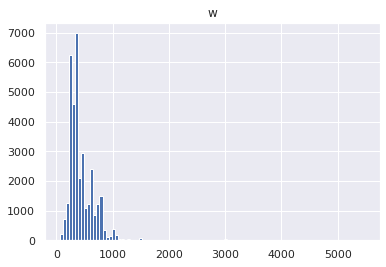

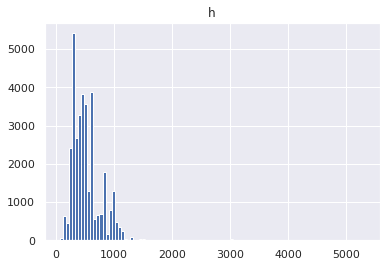

wigth median= 384
height median= 480


In [ ]:
import statistics
plt.hist(wlist,bins=100)
plt.title("w")
plt.show()
plt.hist(hlist,bins=100)
plt.title("h")
plt.show()
print("wigth median=",statistics.median(wlist))
print("height median=",statistics.median(hlist))

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/電腦視覺/final_project/new_test

/content/drive/MyDrive/Colab Notebooks/電腦視覺/final_project/new_test


In [ ]:
for a in os.listdir(dirpath+'/train'):
  print(a)
  os.mkdir(a)


三杯雞
什錦炒麵
咖哩雞
有機小松菜
塔香海茸
小番茄
有機青松菜
客家小炒
棗子
大陸妹
木瓜
柳丁
橘子
沙茶肉片
油菜
福山萵苣
玉米炒蛋
白菜滷
瓜仔肉
番茄炒蛋
滷蛋
白米飯
滷雞腿
洋蔥炒蛋
空心菜
糖醋雞丁
紅蘿蔔炒蛋
菠菜
葡萄
蓮霧
芥藍菜
蒸蛋
蒜泥白肉
西瓜
義大利麵
螞蟻上樹
豆芽菜
關東煮
青江菜
麻油雞
麻婆豆腐
香酥魚排
鵝白菜
馬鈴薯燉肉
鳳梨
高麗菜
麥克雞塊
香蕉
鹽酥雞
黑胡椒豬柳


In [ ]:

print('Resize')
for a in os.listdir(dirpath+'/train'):
  print(a)
  for b in os.listdir(dirpath+'/train/'+a):
    img=cv2.imread(dirpath+'/train/'+a+'/'+b)
    try:
      img=cv2.resize(img,(224,224))
      # cv2_imshow(img)
      cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/電腦視覺/final_project/new_train/'+a+'/'+b,img)
    except:
      print(a+'/'+b+' error')

Resize
三杯雞
什錦炒麵
咖哩雞
有機小松菜
塔香海茸
塔香海茸/40733.gif error
塔香海茸/40836.gif error
小番茄
有機青松菜
有機青松菜/desktop.ini error
客家小炒
棗子
大陸妹
木瓜
柳丁
柳丁/23278.gif error
橘子
橘子/19321.gif error
橘子/19628.gif error
沙茶肉片
油菜
福山萵苣
玉米炒蛋
玉米炒蛋/16298.gif error
白菜滷
瓜仔肉
番茄炒蛋
番茄炒蛋/15547.gif error
滷蛋
白米飯
滷雞腿
滷雞腿/30983.gif error
洋蔥炒蛋
空心菜
空心菜/26268.gif error
空心菜/26432.gif error
空心菜/26944.gif error
糖醋雞丁
紅蘿蔔炒蛋
紅蘿蔔炒蛋/14224.gif error
菠菜
葡萄
蓮霧
芥藍菜
蒸蛋
蒸蛋/35674.gif error
蒸蛋/35656.gif error
蒜泥白肉
西瓜
西瓜/33387.gif error
義大利麵
義大利麵/43662.gif error
義大利麵/44280.gif error
螞蟻上樹
豆芽菜
豆芽菜/37737.gif error
關東煮
關東煮/24814.gif error
青江菜
麻油雞
麻油雞/41925.gif error
麻婆豆腐
香酥魚排
香酥魚排/48438.gif error
香酥魚排/49191.gif error
鵝白菜
鵝白菜/11449.gif error
鵝白菜/11586.gif error
馬鈴薯燉肉
馬鈴薯燉肉/39190.gif error
鳳梨
高麗菜
麥克雞塊
香蕉
香蕉/1285.gif error
香蕉/1550.gif error
香蕉/1686.gif error
鹽酥雞
鹽酥雞/43055.gif error
鹽酥雞/43088.gif error
黑胡椒豬柳


In [11]:
imgSize=(384,480)
imgShape=(384,480,3)
batchSize=32

# train generator
trainDataGenerator = ImageDataGenerator(rescale = 1./255,
                      # augmentation
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      horizontal_flip=True,
                      fill_mode='nearest',
                      validation_split=0.2)
valDataGenerator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

trainBatch = trainDataGenerator.flow_from_directory(
    directory = '/content/sample_data/train',
    target_size = imgSize,
    class_mode = 'categorical',
    shuffle = True,
    batch_size = batchSize,
    subset='training'
)

valBatch = valDataGenerator.flow_from_directory(
    directory = '/content/sample_data/train',
    target_size = imgSize,
    class_mode = 'categorical',
    shuffle = True,
    batch_size = batchSize,
    subset='validation'
)

# test generator
testDataGenerator = ImageDataGenerator(rescale=1./255)

testBatch = testDataGenerator.flow_from_directory(
    directory = '/content/sample_data/test',
    class_mode='categorical',
    shuffle = False,
    batch_size=1,
    target_size= imgSize,
    # classes=['test']
)


Found 22343 images belonging to 50 classes.
Found 5560 images belonging to 50 classes.
Found 7002 images belonging to 50 classes.


## 載入模型

In [12]:
base_model = tf.keras.applications.InceptionResNetV2(
    include_top = False,
    weights = 'imagenet',
    input_tensor = None,
    input_shape=imgShape,

)

x = base_model.output
x = layers.Dropout(0.5)(x)
x = layers.GlobalAveragePooling2D()(x)
# x = layers.BatchNormalization()(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(units = 240, activation = 'relu')(x)
# x = layers.BatchNormalization()(x)
x = layers.Dense(units = 4096, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(units = 50, activation = 'softmax')(x)

# freeze the weight
base_model.trainable = False

model = tf.keras.Model(inputs = base_model.input, outputs = output_layer)

219070464/219055592 [==============================] - 1s 0us/step


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 384, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 191, 239, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 191, 239, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# show the model stucture (截圖用)
model1 = tf.keras.Sequential([
    base_model,
    layers.Dropout(0.5),
    layers.GlobalAveragePooling2D(),
    layers.Dense(units = 4096, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 10, 13, 1536)     54336736  
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 10, 13, 1536)      0         
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 4096)              6295552   
                                                                 
 batch_normalization_204 (Ba  (None, 4096)             16384     
 tchNormalization)                                               
                                                        

## train model

In [15]:
#平衡資料
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
           class_weight = 'balanced', #平衡數據權重：n_samples / (n_classes * np.bincount(y))
           classes = np.unique(trainBatch.classes), #共50個class
           y = trainBatch.classes) #所有元素
print(class_weights)
class_weights = {i : class_weights[i] for i in range(50)} #np.array to dictionary

[1.04406542 0.88838966 0.91569672 1.02256293 0.9735512  0.91382413
 0.81992661 1.08990244 1.41411392 0.86100193 0.97781182 0.80952899
 0.90825203 1.09256724 0.95279318 1.13416244 0.90640974 0.83214153
 1.01790433 0.86768932 1.11436409 1.10883375 1.17286089 5.3197619
 0.85441683 0.92136082 0.90092742 0.84954373 1.67363296 0.917577
 0.99745536 1.07677108 1.10608911 1.28040115 1.12559194 0.87277344
 0.85278626 1.03200924 1.16369792 0.87619608 0.83369403 1.01099548
 1.15170103 0.96514039 0.99523385 0.92902287 1.06395238 0.97995614
 0.91195918 1.02022831]


In [16]:
from keras.metrics import TopKCategoricalAccuracy
epoch=10
model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy',TopKCategoricalAccuracy(k=5,name='top_5_CategoricalAccuracy',dtype=None)])

In [18]:
from keras.callbacks import ModelCheckpoint
# save the best weights
checkpointer = ModelCheckpoint(filepath=dirpath+"food-101-keras+balance+medsize+InceptionResNetV2_model.h5", verbose=1, save_best_only=True)

In [19]:
history = model.fit(
  trainBatch,
  steps_per_epoch = trainBatch.samples // batchSize,
  validation_data = valBatch,
  validation_steps = valBatch.samples // batchSize,
  epochs=epoch,
  class_weight=class_weights,
  callbacks=[checkpointer],
)

Epoch 1/10
179/698 [======>.......................] - ETA: 12:59 - loss: 2.5188 - accuracy: 0.4220 - top_5_CategoricalAccuracy: 0.7640

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


698/698 [==============================] - ETA: 0s - loss: 1.9475 - accuracy: 0.5082 - top_5_CategoricalAccuracy: 0.8425
Epoch 1: val_loss improved from inf to 1.39498, saving model to /content/drive/Shareddrives/DLfinal/food-101-keras+balance+medsize+InceptionResNetV2_model.h5
698/698 [==============================] - 1176s 2s/step - loss: 1.9475 - accuracy: 0.5082 - top_5_CategoricalAccuracy: 0.8425 - val_loss: 1.3950 - val_accuracy: 0.6033 - val_top_5_CategoricalAccuracy: 0.9171
Epoch 2/10
698/698 [==============================] - ETA: 0s - loss: 1.4523 - accuracy: 0.5952 - top_5_CategoricalAccuracy: 0.9045
Epoch 2: val_loss improved from 1.39498 to 1.19641, saving model to /content/drive/Shareddrives/DLfinal/food-101-keras+balance+medsize+InceptionResNetV2_model.h5
698/698 [==============================] - 1148s 2s/step - loss: 1.4523 - accuracy: 0.5952 - top_5_CategoricalAccuracy: 0.9045 - val_loss: 1.1964 - val_accuracy: 0.6451 - val_top_5_CategoricalAccuracy: 0.9245
Epoch 3/1

## show the loss & accuracy curve

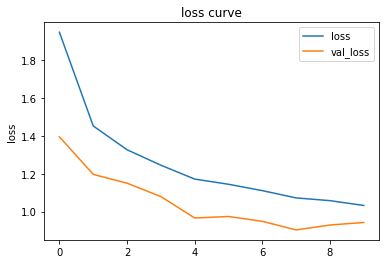

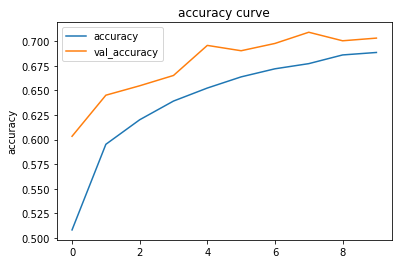

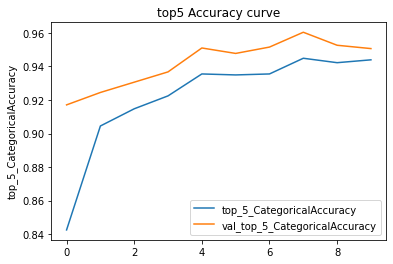

In [20]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.savefig(dirpath+'food-101-keras+balance+medsize+InceptionResNetV2_loss.png')
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(dirpath+'food-101-keras+balance+medsize+InceptionResNetV2_acc.png')
plt.show()
plt.plot(history.history['top_5_CategoricalAccuracy'],label='top_5_CategoricalAccuracy')
plt.plot(history.history['val_top_5_CategoricalAccuracy'],label='val_top_5_CategoricalAccuracy')
plt.title('top5 Accuracy curve')
plt.ylabel('top_5_CategoricalAccuracy')
plt.legend()
plt.savefig(dirpath+'food-101-keras+balance+medsize+InceptionResNetV2_top_5_acc.png')
plt.show()

## predict test data

In [23]:
from keras.models import load_model
model=load_model(dirpath+'food-101-keras+balance+medsize+InceptionResNetV2_model.h5')

In [24]:
testBatch.reset()
test_loss, test_acc,test_Top5acc = model.evaluate_generator(testBatch,steps=testBatch.samples, verbose=1)
print('test acc:', test_acc)
print('test loss:', test_loss)
print('test Top5acc:', test_Top5acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


7002/7002 [==============================] - 358s 51ms/step - loss: 0.9513 - accuracy: 0.7017 - top_5_CategoricalAccuracy: 0.9529
test acc: 0.701656699180603
test loss: 0.9512563943862915
test Top5acc: 0.9528706073760986


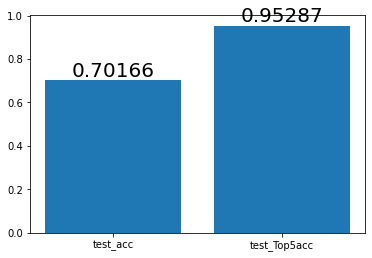

In [25]:
x=['test_acc','test_Top5acc']
y=[test_acc,test_Top5acc]
plt.bar(x,y)
plt.text(0, test_acc, '%.5f' % test_acc, ha='center', va= 'bottom',fontsize=20)
plt.text(1, test_Top5acc, '%.5f' % test_Top5acc, ha='center', va= 'bottom',fontsize=20)
plt.savefig(dirpath+'food-101-keras+balance+medsize+InceptionResNetV2_Test.png')

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(testBatch)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(y_pred)
print(testBatch.classes)
print(confusion_matrix(testBatch.classes, y_pred))
# print('Classification Report')
# target_names = ['Cats', 'Dogs', 'Horse']
# print(classification_report(testBatch.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[ 0  0  0 ...  5 22  5]
[ 0  0  0 ... 49 49 49]
[[113   1   0 ...   0   3   0]
 [  0 117   0 ...   0   0   0]
 [ 17   0  53 ...   5   1   0]
 ...
 [  5   0   1 ... 106   0   0]
 [ 65   0   3 ...   2  42   0]
 [  1   7   0 ...   4   2  46]]


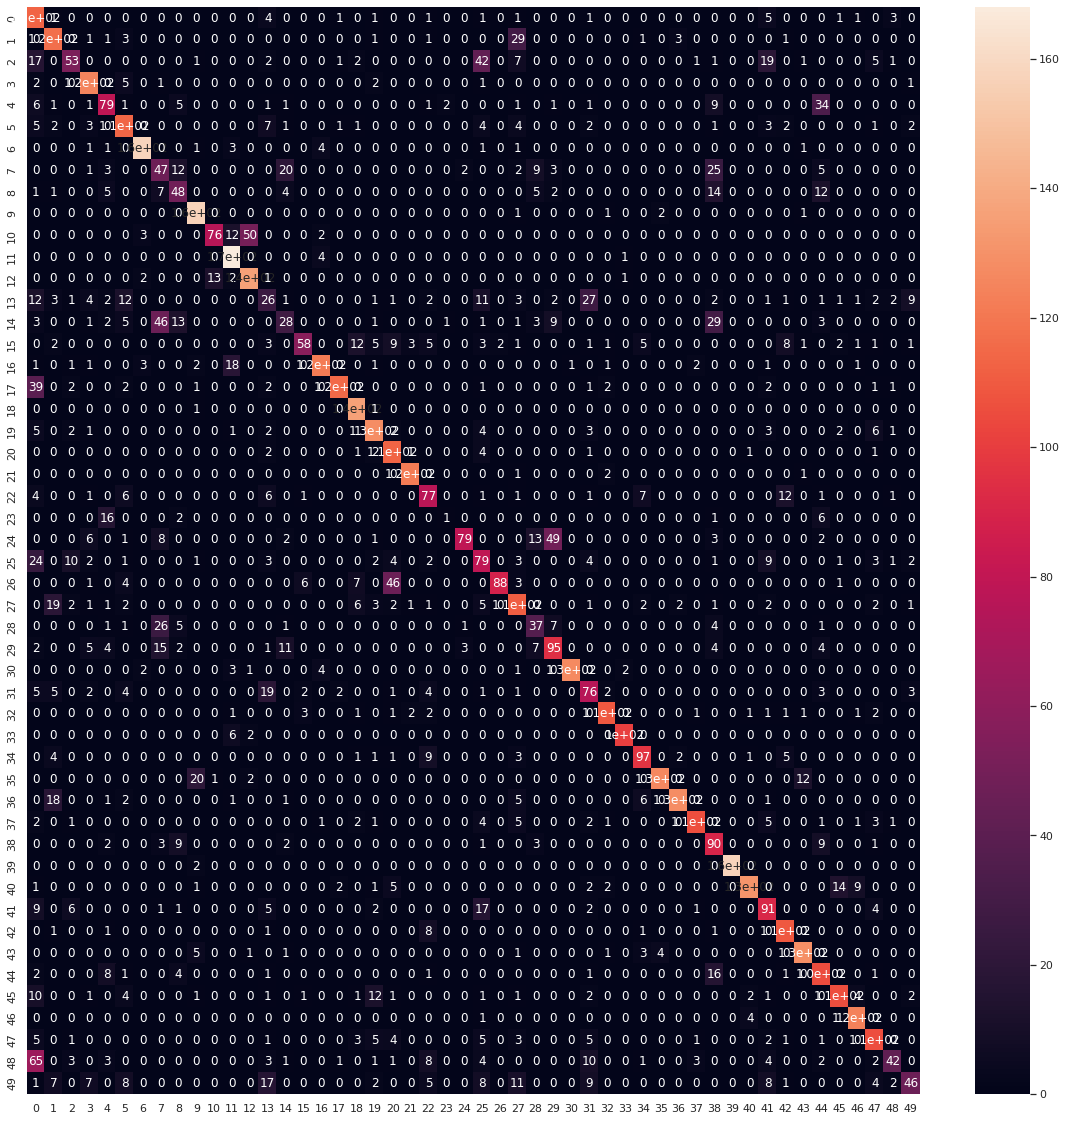

In [27]:
import seaborn as sns
C=confusion_matrix(testBatch.classes, y_pred)
df=pd.DataFrame(C)
plt.figure(figsize=(20,20))
sns.set(font_scale = 1)
sns.heatmap(df,annot=True)
plt.savefig(dirpath+'food-101-keras+balance+medsize+InceptionResNetV2_ConfusionMatrix.png')

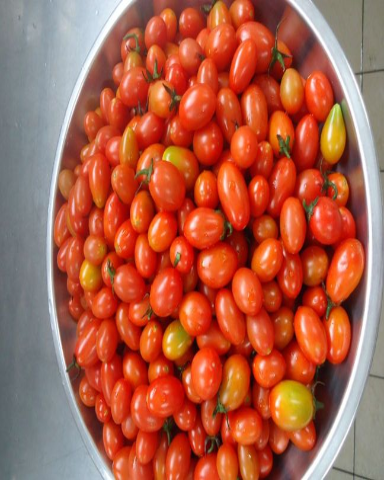

30


In [28]:
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/Shareddrives/DLfinal/test/小番茄/18025.jpg')
img=cv2.resize(img,(384,480))
cv2_imshow(img)
img=img/255
img=img.reshape(1,384,480,3)
pre=model.predict(img)
print(np.argmax(pre))